In [1]:
# Install required packages (if not already installed)
!pip install xgboost seaborn scikit-learn matplotlib pandas

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 812.7 kB/s eta 0:02:34
   ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:44
   ---------------------------------------- 0.4/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.1/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 1.9/124.9 MB 8.2 MB/s eta 0:00:15
    --------------------------------------- 2.7/124.9 MB 9.6 MB/s eta 0:00:13
   - -------------------------------------- 3.7/124.9 MB 11.7 MB/s eta 0:00:11
   - -------------------------------------- 5.3/124.9 MB 14.0 MB/s eta 0:00:09
   -- ------------------------------------- 6.8/124.9 MB 16.1 MB/s eta 0:00:08
   -- ------------------------------------- 7.5/124.9 MB 16.6 MB/s eta 0:00:08
   -- ------------------------------------- 7.7/124.9 MB 14.9 MB/s eta 0

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset from the specified path
data = pd.read_csv(r"D:\New Project\payment_fraud\payment_fraud.csv")

In [7]:
# Display basic information about the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Head:
   accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3             503         1   4.886641    creditcard              0.000000   
4            2000         1   5.040929    creditcard              0.000000   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeD

In [9]:
# Handle missing values (if any)
data = data.dropna()

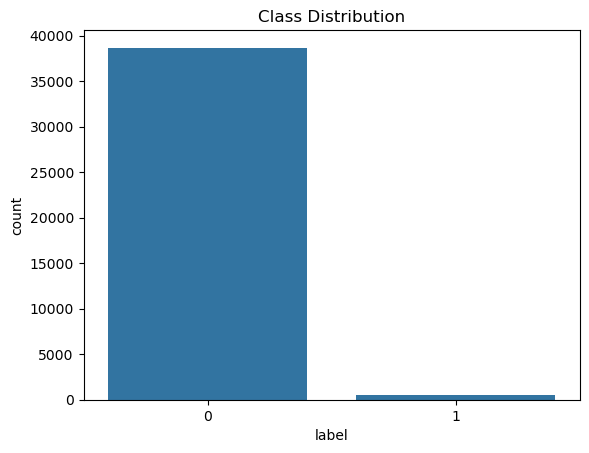

In [11]:
# Check for class imbalance
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.show()

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
if 'paymentMethod' in data.columns:  # Encode if the column exists
    data['paymentMethod'] = label_encoder.fit_transform(data['paymentMethod'])

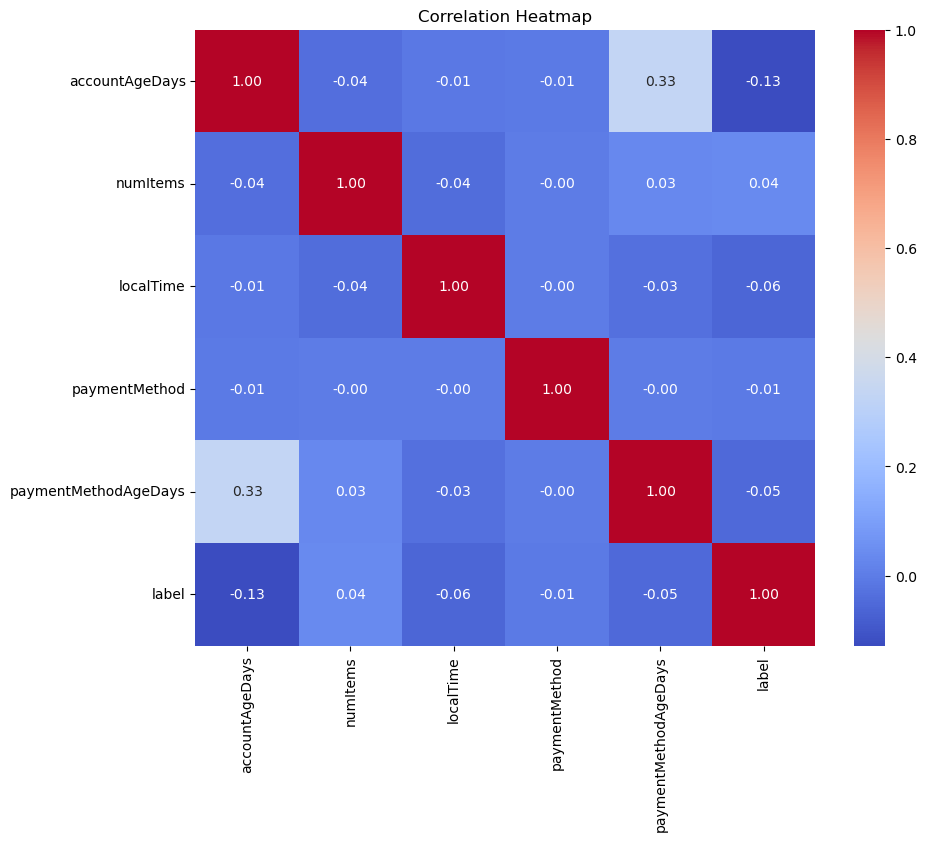

In [15]:
# Heatmap for feature correlation
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()  # Compute correlation matrix after encoding
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Split data into features and target
X = data.drop(columns=['label'])
y = data['label']

In [19]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [31]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7733
           1       1.00      1.00      1.00       112

    accuracy                           1.00      7845
   macro avg       1.00      1.00      1.00      7845
weighted avg       1.00      1.00      1.00      7845



In [33]:
# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

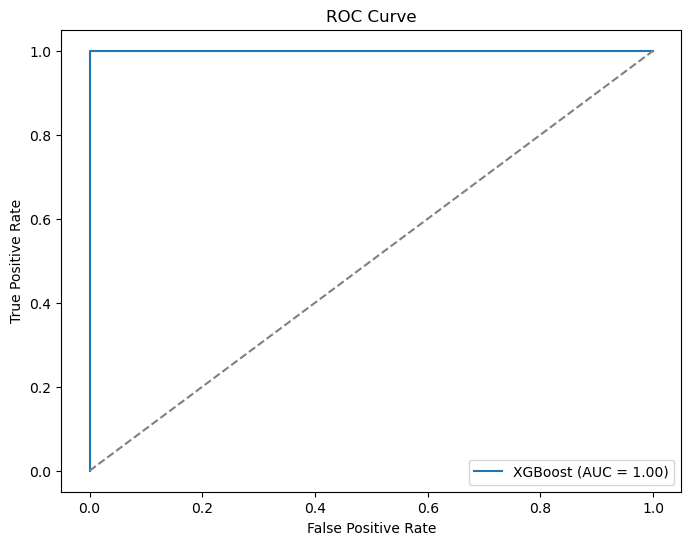

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()